In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [3]:
rand = tf.random.uniform(shape=[1], minval=0, maxval=1)
print(rand)
print(rand.shape)
rand.shape


tf.Tensor([0.59366465], shape=(1,), dtype=float32)
(1,)


TensorShape([1])

In [4]:
rand = tf.random.uniform(shape=[4], minval=0, maxval=1)
print(rand)
print(rand.shape)
rand.shape


tf.Tensor([0.20086873 0.02248764 0.358716   0.04572976], shape=(4,), dtype=float32)
(4,)


TensorShape([4])

In [5]:
rand = tf.random.normal(shape=[4], mean=0, stddev=1)
print(rand)
print(rand.shape)
rand.shape


tf.Tensor([0.6239485  0.15181549 0.2809135  2.803101  ], shape=(4,), dtype=float32)
(4,)


TensorShape([4])

In [6]:
rand=tf.random.uniform(shape=[4])
print(rand)
rand=tf.random.normal(shape=[4])
print(rand)

tf.Tensor([0.7498486  0.40701413 0.9997287  0.9503472 ], shape=(4,), dtype=float32)
tf.Tensor([-0.5471193  -1.3814442  -0.47717926  0.5536973 ], shape=(4,), dtype=float32)


In [7]:
print(rand[0])
print(rand[1])
print(rand[2])
print(rand[3])


tf.Tensor(-0.5471193, shape=(), dtype=float32)
tf.Tensor(-1.3814442, shape=(), dtype=float32)
tf.Tensor(-0.47717926, shape=(), dtype=float32)
tf.Tensor(0.5536973, shape=(), dtype=float32)


In [8]:
import tensorflow as tf
w = tf.Variable(2.0)
b = tf.Variable(0.7)


In [9]:
x = 1.5
y = w*x+b


In [13]:
print(f"y: {y}")
print(y)
y


y: 3.700000047683716
tf.Tensor(3.7, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=3.7>

In [12]:
if y == 3.7:
    print("Right")


Right


In [15]:
import numpy as np
import tensorflow as tf
x = list(range(1, 11))
y = [3, 5, 5, 6, 7, 7, 8, 9, 9, 10]


In [17]:
w = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))


def compute_loss():
    y_pred = w*x+b
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss


In [19]:
optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w, b])

    if i % 100 == 0:
        print(i, "loss:", compute_loss().numpy(), "\n")
print("final w:", w)
print("final b:", b)


0 loss: 0.48590302 

100 loss: 0.14182666 

200 loss: 0.14181814 

300 loss: 0.14181824 

400 loss: 0.1418181 

500 loss: 0.1418181 

600 loss: 0.1418181 

700 loss: 0.1418182 

800 loss: 0.1418181 

900 loss: 0.1418182 

final w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.70909095], dtype=float32)>
final b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>


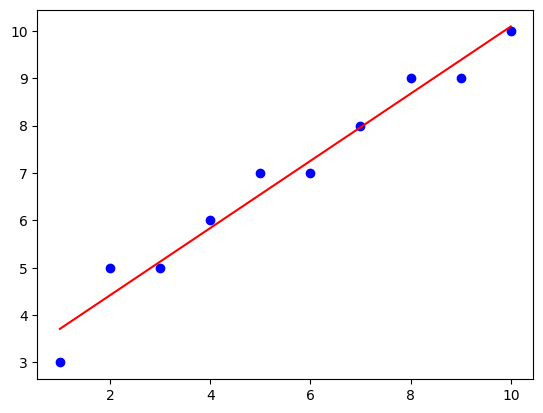

In [22]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.plot(x, w*x+b, 'red')
plt.show()


In [21]:
np.__version__


'1.21.6'

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=1))
model.add(tf.keras.layers.Dense(units=1))
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse', optimizer=opt)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x, y, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 57.0261
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 43.0456
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 32.3302
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 23.8161
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 16.8297
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 11.2854
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 7.4094
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.1282
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.8792
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1800
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.8187
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.7378
Epoch 13/1000
1/1 [=====================

In [26]:
model.predict(x)


1/1 [==============================] - 0s 133ms/step


array([[3.0145242],
       [4.786483 ],
       [5.271472 ],
       [5.97231  ],
       [6.73022  ],
       [7.366704 ],
       [7.9910755],
       [8.661676 ],
       [9.318041 ],
       [9.887071 ]], dtype=float32)

1/1 [==============================] - 0s 53ms/step


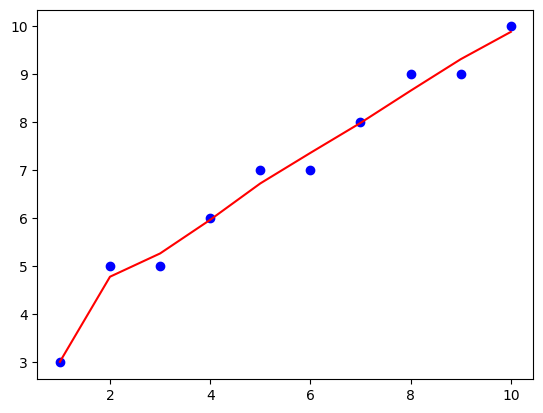

In [27]:
plt.plot(x, y, 'bo')
plt.plot(x, model.predict(x), 'red')
plt.show()


In [44]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)  # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)


(60000, 28, 28)
(10000, 28, 28)


In [45]:
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

In [46]:
print(type(test_images))
import numpy as np
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


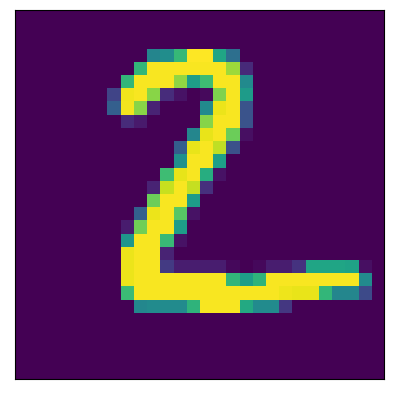

In [47]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1])
plt.xticks([])
plt.yticks([])
plt.show()

In [48]:
print(test_images)
print(len(test_images))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
10000


In [49]:
my_slice = test_images[0:100]
print(my_slice.shape)

my_slice = test_images[0:100, 0:28, 0:28]
my_slice = test_images[0:100, :, :]
my_slice

(100, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
type(test_images)


numpy.ndarray

In [51]:
print(len(train_labels))
print(len(test_labels))

print(train_labels)
print(test_labels)


60000
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [89]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])


In [90]:
train_images_r = train_images.reshape((60000, 28*28))
train_images_r = train_images_r.astype('float32')/255
test_images_r = test_images.reshape((10000, 28*28))
test_images_r = test_images_r.astype('float32')/255


In [91]:
train_images.shape


(60000, 28, 28)

In [87]:
train_images_r.shape


(60000, 784)

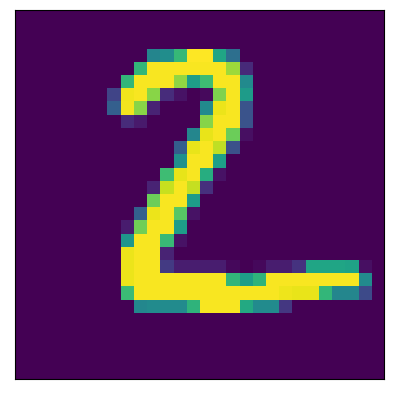

In [96]:
plt.imshow(test_images[1]/255.)
plt.xticks([])
plt.yticks([])
plt.show()


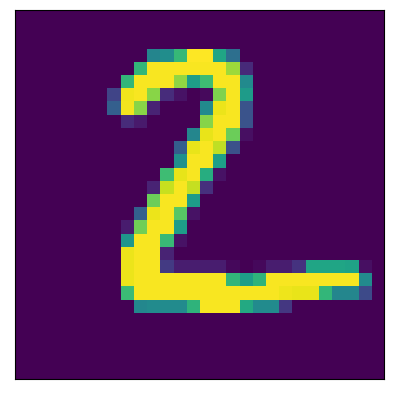

In [98]:
plt.imshow(test_images[1])
plt.xticks([])
plt.yticks([])
plt.show()


In [99]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255


In [100]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [103]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=1024)


Epoch 1/5
59/59 [==============================] - 2s 20ms/step - loss: 0.5981 - accuracy: 0.8408
Epoch 2/5
59/59 [==============================] - 1s 21ms/step - loss: 0.2647 - accuracy: 0.9244
Epoch 3/5
59/59 [==============================] - 1s 22ms/step - loss: 0.1993 - accuracy: 0.9437
Epoch 4/5
59/59 [==============================] - 1s 21ms/step - loss: 0.1608 - accuracy: 0.9536
Epoch 5/5
59/59 [==============================] - 1s 20ms/step - loss: 0.1337 - accuracy: 0.9622


In [104]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.1375 - accuracy: 0.9572
test_acc: 0.9571999907493591


In [106]:
x = np.array(12)
print(x)
print(type(x))
print(x.ndim)


12
<class 'numpy.ndarray'>
0


In [107]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(type(x))
print(x.ndim)


[12  3  6 14  7]
<class 'numpy.ndarray'>
1


In [109]:
x = np.array([[12, 3, 6, 14, 7], [10, 5, 8, 13, 8], [11, 6, 7, 12, 7]])
print(x)
print(type(x))
print(x.ndim)


[[12  3  6 14  7]
 [10  5  8 13  8]
 [11  6  7 12  7]]
<class 'numpy.ndarray'>
2


In [110]:
x = np.array([[[12, 3, 6, 14, 7],
               [10, 5, 8, 13, 8],
               [11, 6, 7, 12, 7]],
              [[12, 3, 6, 14, 7],
               [10, 5, 8, 13, 8],
               [11, 6, 7, 12, 7]],
              [[12, 3, 6, 14, 7],
               [10, 5, 8, 13, 8],
               [11, 6, 7, 12, 7]]])
print(x)
print(type(x))
print(x.ndim)


[[[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]]
<class 'numpy.ndarray'>
3


In [112]:
x = np.array([[[[12, 3, 6, 14, 7],
                 [10, 5, 8, 13, 8],
                 [11, 6, 7, 12, 7]],
              [[12, 3, 6, 14, 7],
                 [10, 5, 8, 13, 8],
                 [11, 6, 7, 12, 7]],
              [[12, 3, 6, 14, 7],
                 [10, 5, 8, 13, 8],
                 [11, 6, 7, 12, 7]]],


              [[[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]],
               [[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]],
               [[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]]],


              [[[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]],
               [[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]],
               [[12, 3, 6, 14, 7],
                  [10, 5, 8, 13, 8],
                  [11, 6, 7, 12, 7]]]])
print(x)
print(type(x))
print(x.ndim)


[[[[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]]


 [[[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]]


 [[[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]]]
<class 'numpy.ndarray'>
4


In [113]:
import pandas as pd
path = "c:\\pytest\\"
df = pd.read_csv(path+'BostonHousing.csv', delim_whitespace=False, header=0)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
x = np.arange(0, 10, 0.2) 
y = np.sin(x) 
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0]) 
ax0.plot(x, y) 
ax1 = plt.subplot(gs[1]) 
ax1.plot(y, x) 
plt.tight_layout() 

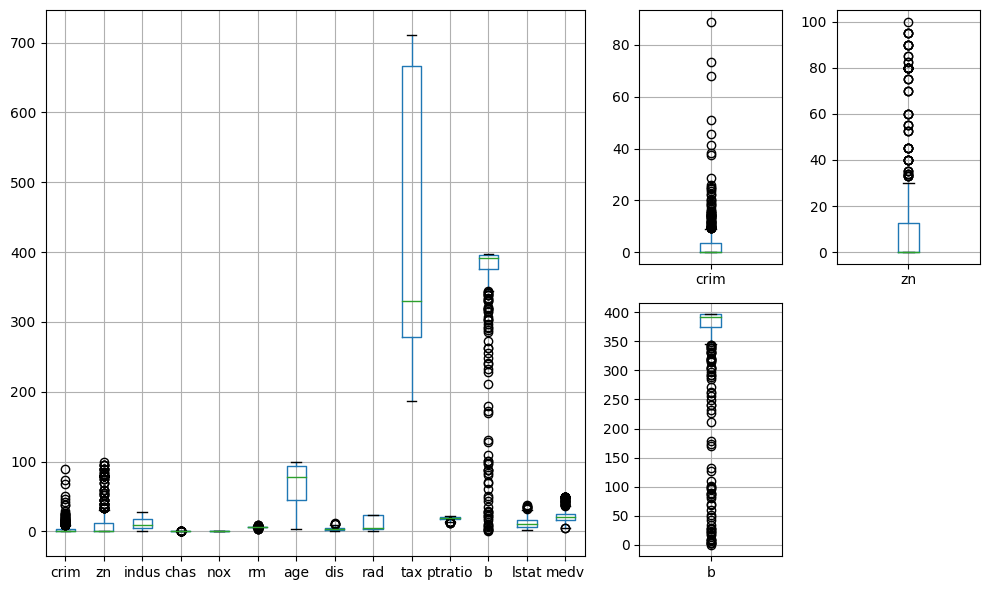

In [146]:
import matplotlib.gridspec as gridspec
gs0 = gridspec.GridSpec(2,5)
plt.figure(figsize=(10,6))
plt.subplot(gs0[:,0:3])
df.boxplot()
plt.subplot(gs0[0,3])
df.boxplot(column='crim')
plt.subplot(gs0[0,4])
df.boxplot(column='zn')
plt.subplot(gs0[1,3])
df.boxplot(column='b')
plt.tight_layout()
plt.show()

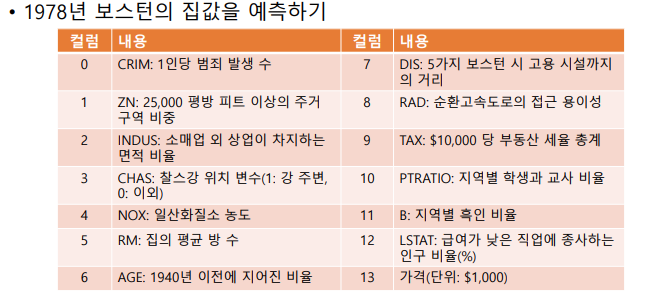

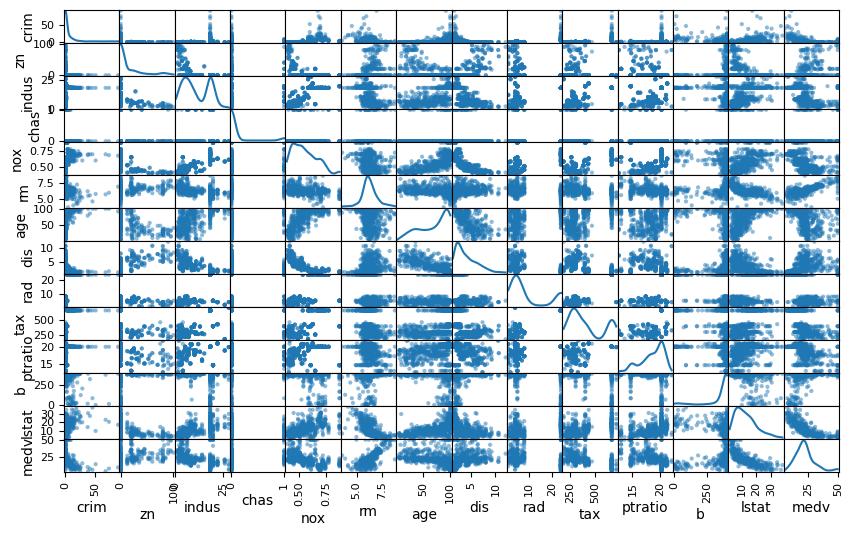

In [151]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.5, figsize=(10, 6), diagonal='kde')
plt.show()


In [153]:
from msilib import sequence
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=13))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                420       
                                                                 
 dense_21 (Dense)            (None, 16)                496       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [155]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [156]:
model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, y_train, epochs=200, batch_size=10)


Epoch 1/200
38/38 [==============================] - 1s 5ms/step - loss: 8.1152
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 5.4069
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 5.1738
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 5.2160
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 4.8084
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 5.2470
Epoch 7/200
38/38 [==============================] - 0s 5ms/step - loss: 4.9261
Epoch 8/200
38/38 [==============================] - 0s 5ms/step - loss: 4.6910
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 4.7534
Epoch 10/200
38/38 [==============================] - 0s 4ms/step - loss: 4.9417
Epoch 11/200
38/38 [==============================] - 0s 4ms/step - loss: 4.7277
Epoch 12/200
38/38 [==============================] - 0s 4ms/step - loss: 4.4613
Epoch 13/200
38/38 [=================

4/4 [==============================] - 0s 3ms/step


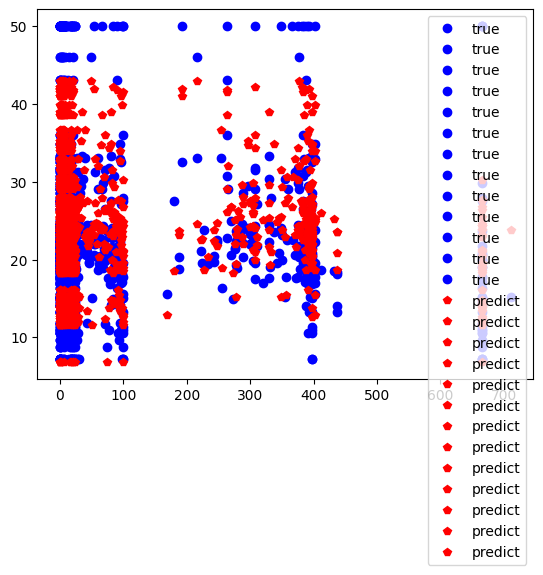

In [163]:
plt.plot(X_test, y_test, 'bo', label='true')
plt.plot(X_test, model.predict(X_test), 'p', color='red', label='predict')
plt.legend()
plt.show()
# 이렇게 하면 안된다.

In [166]:
model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


array([[19.978533 ],
       [32.7163   ],
       [23.086512 ],
       [25.362497 ],
       [30.204353 ],
       [13.777055 ],
       [24.068653 ],
       [14.192822 ],
       [13.426865 ],
       [41.47128  ],
       [38.587925 ],
       [26.02132  ],
       [24.617222 ],
       [18.854925 ],
       [15.414721 ],
       [20.477327 ],
       [27.087769 ],
       [23.739162 ],
       [19.598625 ],
       [24.289356 ],
       [25.923527 ],
       [21.704708 ],
       [26.23037  ],
       [25.035946 ],
       [23.84647  ],
       [25.41769  ],
       [15.117923 ],
       [26.792353 ],
       [23.599422 ],
       [35.990124 ],
       [23.1396   ],
       [24.638113 ],
       [26.377804 ],
       [18.64141  ],
       [34.9055   ],
       [29.619658 ],
       [35.18871  ],
       [23.956966 ],
       [43.006233 ],
       [20.924086 ],
       [21.188444 ],
       [25.84068  ],
       [19.462906 ],
       [27.488317 ],
       [20.945665 ],
       [24.297539 ],
       [21.546732 ],
       [13.95

In [167]:
from sklearn.metrics import mean_squared_error
pred=model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

4/4 [==============================] - 0s 4ms/step
6.1523189171294606


In [170]:
import pandas as pd
df = pd.read_csv(path+'pima-indians-diabetes.csv',header=0)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


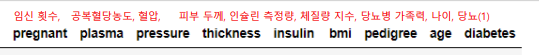

In [171]:
df = df.sample(frac=1)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
21,8,99,84,0,0,35.4,0.388,50,0
14,5,166,72,19,175,25.8,0.587,51,1
291,0,107,62,30,74,36.6,0.757,25,1
715,7,187,50,33,392,33.9,0.826,34,1
643,4,90,0,0,0,28.0,0.610,31,0


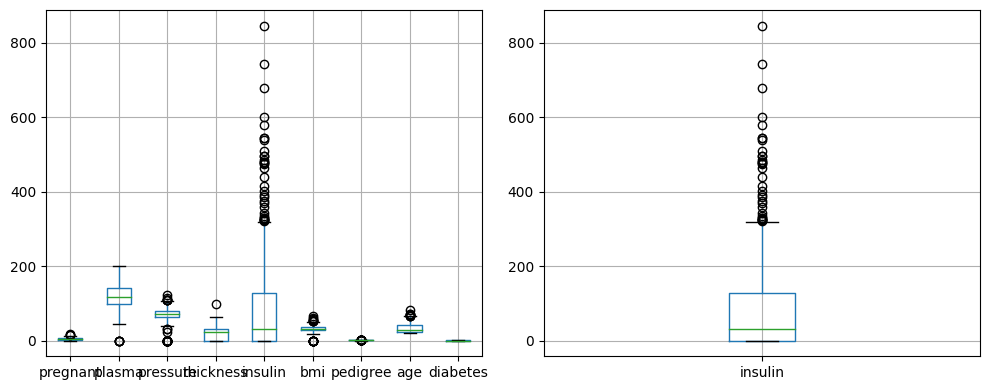

In [178]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
df.boxplot()
plt.subplot(122)
df.boxplot(column='insulin')
plt.tight_layout()
plt.show()


In [177]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print("*"*20)
print(X_test.head())


     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
554         1      84        64         23      115  36.9     0.471   28
340         1     130        70         13      105  25.9     0.472   22
463         5      88        78         30        0  27.6     0.258   37
424         8     151        78         32      210  42.9     0.516   36
396         3      96        56         34      115  24.7     0.944   39
********************
     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
527         3     116        74         15      105  26.3     0.107   24
4           0     137        40         35      168  43.1     2.288   33
82          7      83        78         26       71  29.3     0.767   36
572         3     111        58         31       44  29.5     0.430   22
624         2     108        64          0        0  30.8     0.158   21


In [182]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, 'relu', input_dim=8))
model.add(tf.keras.layers.Dense(8, 'relu'))
model.add(tf.keras.layers.Dense(1, 'sigmoid'))

In [185]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 12)                108       
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
58/58 [==============================] - 1s 5ms/step - loss: 2.6274 - acc: 0.5868
Epoch 2/200
58/58 [==============================] - 0s 5ms/step - loss: 0.9040 - acc: 0.5972
Epoch 3/200
58/58 [==============================] - 0s 5ms/step - loss: 0.7100 - acc: 0.6215
Epoch 4/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6614 - acc: 0.6389
Epoch 5/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6437 - acc: 0.6285
Epoch 6/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6312 - acc: 0.6406
Epoch 7/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6272 - acc: 0.6389
Epoch 8/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6141 - acc: 0.6493
Epoch 9/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6096 - acc: 0.6632
Epoch 10/200
58/58 [==============================] - 0s 5ms/step - loss: 0.6055 - acc: 0.6545
Epoch 11/200
58/58 [==============================] - 0s 5m

In [188]:
print('Test Data Accuracy: ', model.evaluate(X_test, y_test)[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.5883 - acc: 0.7188
Test Data Accuracy:  0.71875


In [189]:
pred = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


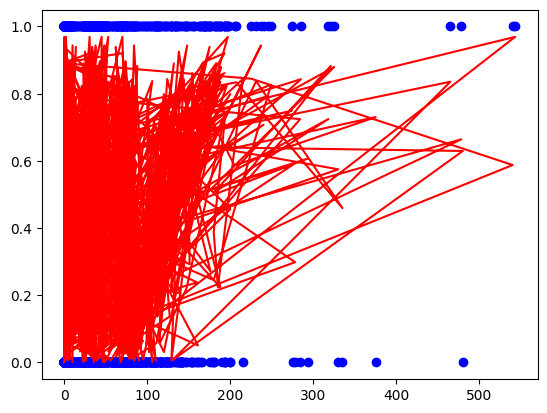

In [203]:
plt.plot(X_test, y_test,'bo',label='True')
plt.plot(X_test, pred,'r',label='predict')
plt.show() #id but len200, 선분x, 01분류, 전부 다해도 뭘 말하는지 모름

In [197]:
len(pred) 
binary_pred = [1 if i>=0.5 else 0 for i in pred]

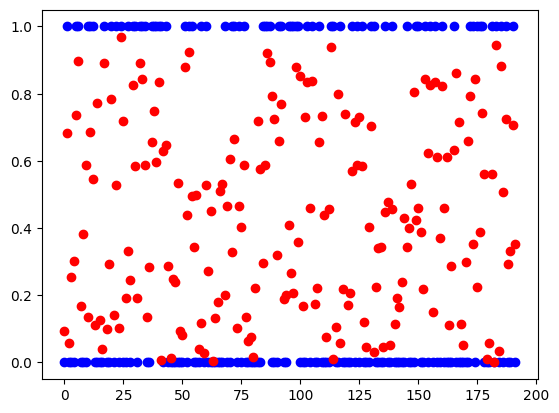

In [201]:
plt.plot(range(len(y_test)), y_test,'bo',label='True')
plt.plot(range(len(y_test)), pred,'ro',label='predict')
plt.show()

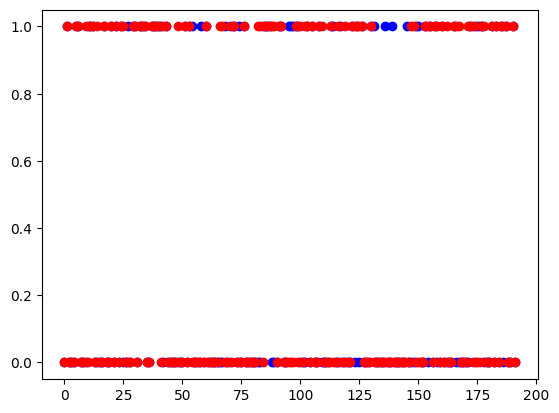

In [204]:
plt.plot(range(len(y_test)), y_test,'bo',label='True')
plt.plot(range(len(y_test)), binary_pred,'ro',label='predict')
plt.show()